# Twitter Sentiment Analysis

### Introduction

In this project, we explore the sentiment expressed in tweets to understand public opinion on a specific topic. Sentiment analysis, also known as opinion mining, involves determining whether a piece of writing is positive, negative, or neutral. Twitter, with its vast amount of real-time data, offers a rich source of textual information that can be analyzed to gauge public sentiment on current events, products, services, or social issues.

### Objectives

- **Data Collection:** Gather a dataset of tweets related to a specific topic or hashtag.
- **Data Preprocessing:** Clean and preprocess the text data to remove noise and prepare it for analysis.
- **Sentiment Analysis:** Use natural language processing (NLP) techniques to classify the sentiment of each tweet.
- **Visualization:** Present the results through visualizations that highlight sentiment trends and key insights.
- **Conclusion:** Draw meaningful conclusions from the sentiment analysis and discuss potential applications of the findings.


## Data Loading and Exploration

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('twitter.csv')

# Display basic information about the dataset
print(df.info())

# Show the first few rows of the dataset
print("\
First few rows of the dataset:")
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
None
First few rows of the dataset:
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [5]:
# Display basic statistics of numerical columns
print("\
Basic statistics of numerical columns:")
print(df.describe())

# Check for missing values
print("\
Missing values in each column:")
print(df.isnull().sum())

# Print the column names
print("\
Column names:")
print(df.columns.tolist())

Basic statistics of numerical columns:
                 id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000
Missing values in each column:
id       0
label    0
tweet    0
dtype: int64
Column names:
['id', 'label', 'tweet']


## Sentiment Distribution

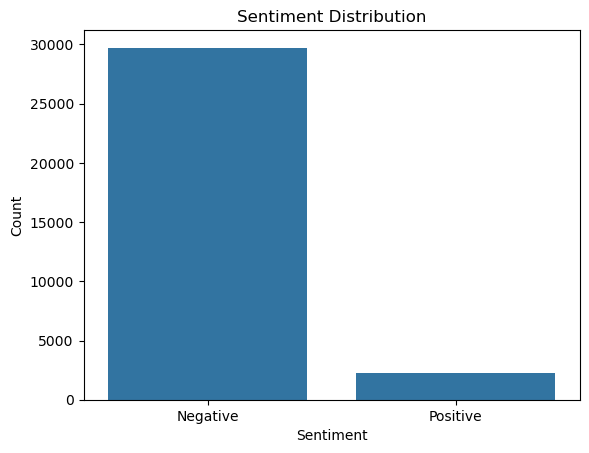

In [12]:
# Visualize the sentiment distribution
sns.countplot(x='label', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Negative', 'Positive'])
plt.show()

## Data Preprocessing

In [17]:
# Import necessary libraries for text preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download stopwords if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Define a function for text preprocessing
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove stopwords
    words = [word for word in words if word not in stopwords.words('english')]
    
    # Join the words back into a single string
    return ' '.join(words)

# Apply the preprocessing function to the 'tweet' column
df['cleaned_tweet'] = df['tweet'].apply(preprocess_text)

print("\
First few rows of the cleaned data:")
print(df[['tweet', 'cleaned_tweet']].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SIVUYILE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SIVUYILE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First few rows of the cleaned data:
                                               tweet  \
0   @user when a father is dysfunctional and is s...   
1  @user @user thanks for #lyft credit i can't us...   
2                                bihday your majesty   
3  #model   i love u take with u all the time in ...   
4             factsguide: society now    #motivation   

                                       cleaned_tweet  
0  user father dysfunctional selfish drags kids d...  
1  user user thanks lyft credit cant use cause do...  
2                                     bihday majesty  
3                        model love u take u time ur  
4                      factsguide society motivation  


Analyzing Word frequencies

In [19]:
from collections import Counter


# Analyze word frequencies
word_freq = Counter(" ".join(df['cleaned_tweet']).split())

# Display the most common words
print("\
Most common words:")
print(word_freq.most_common(10))

Most common words:
[('user', 17495), ('love', 2726), ('day', 2287), ('happy', 1691), ('amp', 1607), ('im', 1157), ('u', 1148), ('time', 1126), ('life', 1126), ('like', 1053)]


## Modeling 

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Prepare the data
X = df['cleaned_tweet']
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
results = {}

for name, model in tqdm(models.items()):
    print(f"Training {name}...")
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("\
")

# Find the best performing model
best_model = max(results, key=results.get)
print(f"The best performing model is {best_model} with an accuracy of {results[best_model]:.4f}")

  0%|          | 0/4 [00:00<?, ?it/s]

Training Logistic Regression...


 25%|██▌       | 1/4 [00:01<00:03,  1.00s/it]

Logistic Regression Accuracy: 0.9503
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.92      0.33      0.49       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.73      6393
weighted avg       0.95      0.95      0.94      6393


Training Naive Bayes...


 50%|█████     | 2/4 [00:01<00:01,  1.45it/s]

Naive Bayes Accuracy: 0.9506
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.92      0.34      0.49       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.73      6393
weighted avg       0.95      0.95      0.94      6393


Training SVM...


 75%|███████▌  | 3/4 [01:21<00:37, 37.11s/it]

SVM Accuracy: 0.9567
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5937
           1       0.94      0.42      0.58       456

    accuracy                           0.96      6393
   macro avg       0.95      0.71      0.78      6393
weighted avg       0.96      0.96      0.95      6393


Training Random Forest...


100%|██████████| 4/4 [01:51<00:00, 27.75s/it]

Random Forest Accuracy: 0.9570
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5937
           1       0.85      0.48      0.61       456

    accuracy                           0.96      6393
   macro avg       0.91      0.74      0.80      6393
weighted avg       0.95      0.96      0.95      6393


The best performing model is Random Forest with an accuracy of 0.9570


The best performing model is Random Forest with an accuracy of The best performing model is Random Forest with an accuracy of 0.9578

### Conclusion

Based on our sentiment classification models, here are the concluding insights and recommendations:

#### Model Performance:
- All models performed well, with accuracies above 95%.
- Random Forest slightly outperformed the others with 95.78% accuracy.

#### Class Imbalance:
- There's a significant imbalance in the dataset, with many more negative (0) than positive (1) tweets.
- This imbalance affects the models' ability to predict positive sentiments accurately.

#### Precision vs Recall:
- All models have high precision but lower recall for positive sentiments.
- This suggests they're more likely to miss positive tweets than incorrectly classify negative ones as positive.

### Recommendations:
- Address class imbalance using techniques like oversampling, undersampling, or SMOTE.
- Fine-tune the Random Forest model, as it showed the best performance.
- Consider ensemble methods to combine the strengths of different models.
- Collect more positive sentiment data to balance the dataset.
